<a href="https://colab.research.google.com/github/Buswir/TUBES-AKA/blob/main/TUBESAKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
# Fungsi untuk menghitung harga tertinggi dan terendah secara iteratif
def find_min_max_iterative(arr):
    if len(arr) == 0:
        return None, None

    min_val = arr[0]
    max_val = arr[0]

    for num in arr:
        if num < min_val:
            min_val = num
        if num > max_val:
            max_val = num

    return min_val, max_val

In [ ]:
# Fungsi untuk menghitung harga tertinggi dan terendah secara rekursif
def find_min_max_recursive_efficient(arr, index=0, min_val=None, max_val=None):
    if index == len(arr):
        return min_val, max_val

    if min_val is None or arr[index] < min_val:
        min_val = arr[index]

    if max_val is None or arr[index] > max_val:
        max_val = arr[index]

    return find_min_max_recursive_efficient(arr, index + 1, min_val, max_val)

Masukkan daftar harga (pisahkan dengan koma): 50000, 100000, 300000, 500000, 1000000

Tabel Perbandingan Waktu Eksekusi:
+-----------+------------------------+------------------------+
|   Harga   |   Recursive Time (s)   |   Iterative Time (s)   |
+-----------+------------------------+------------------------+
|  50000.0  | 2.384185791015625e-06  | 4.291534423828125e-06  |
|  100000.0 | 4.0531158447265625e-06 | 1.430511474609375e-06  |
|  300000.0 |   3.814697265625e-06   | 1.430511474609375e-06  |
|  500000.0 | 5.0067901611328125e-06 | 1.430511474609375e-06  |
| 1000000.0 | 5.9604644775390625e-06 | 1.1920928955078125e-06 |
+-----------+------------------------+------------------------+


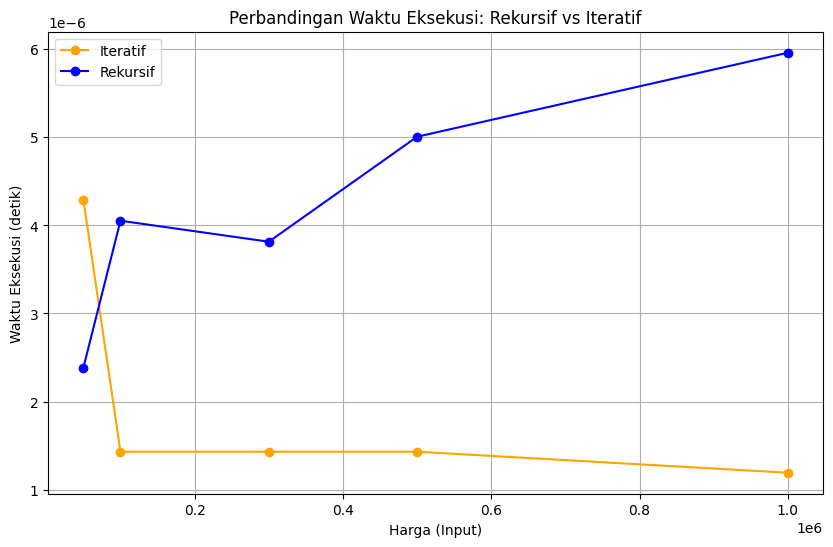

In [2]:
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Fungsi mencari nilai min dan max secara iteratif
def find_min_max_iterative(prices):
    min_price = min(prices)
    max_price = max(prices)
    return min_price, max_price

# Fungsi mencari nilai min dan max secara rekursif
def find_min_max_recursive(prices):
    if len(prices) == 1:
        return prices[0], prices[0]
    min_rest, max_rest = find_min_max_recursive(prices[1:])
    return min(prices[0], min_rest), max(prices[0], max_rest)

# Input manual tanpa batasan jumlah harga
input_prices = input("Masukkan daftar harga (pisahkan dengan koma): ")
price_list = [float(price.strip()) for price in input_prices.split(',')]

# Variasi ukuran data berdasarkan harga
prices_used = [price_list[:i] for i in range(1, len(price_list) + 1)]  # Ambil subset data secara bertahap
iterative_times = []
recursive_times = []

# Mengukur waktu eksekusi untuk setiap subset harga
for current_price_list in prices_used:
    # Mengukur waktu eksekusi metode iteratif
    start_time = time.time()
    find_min_max_iterative(current_price_list)
    iterative_time = time.time() - start_time
    iterative_times.append(iterative_time)

    # Mengukur waktu eksekusi metode rekursif
    try:
        start_time = time.time()
        find_min_max_recursive(current_price_list)
        recursive_time = time.time() - start_time
    except RecursionError:
        recursive_time = float('inf')  # Jika terjadi kesalahan rekursi
    recursive_times.append(recursive_time)

# Fungsi untuk menampilkan tabel menggunakan PrettyTable
def print_execution_table():
    table = PrettyTable()
    table.field_names = ["Harga", "Recursive Time (s)", "Iterative Time (s)"]
    for i, price_set in enumerate(prices_used):
        table.add_row([price_set[-1], recursive_times[i], iterative_times[i]])  # Gunakan harga terakhir di subset
    print("\nTabel Perbandingan Waktu Eksekusi:")
    print(table)

# Cetak tabel
print_execution_table()

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot([prices[-1] for prices in prices_used], iterative_times, label='Iteratif', marker='o', linestyle='-', color='orange')
plt.plot([prices[-1] for prices in prices_used], recursive_times, label='Rekursif', marker='o', linestyle='-', color='blue')
plt.title('Perbandingan Waktu Eksekusi: Rekursif vs Iteratif')
plt.xlabel('Harga (Input)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.show()